In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import wfdb

In [2]:
data_path = "/network/scratch/o/ortizgas/transit_datasets/icentia11k_wfdb/wfdb/"

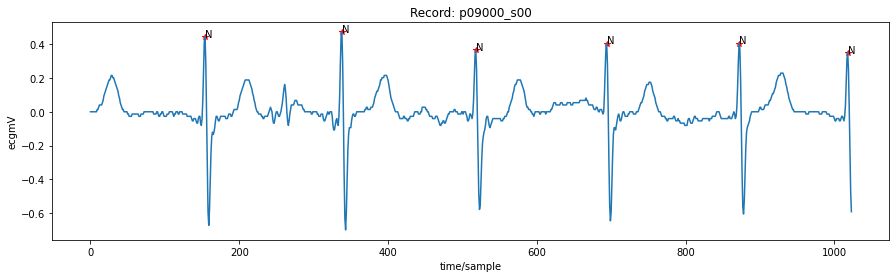

In [3]:
# Fetch a sequence. Here N=Normal: Normal beat
patient_id=9000
segment_id=0
start=2000
length=1024
filename = f'{data_path}/p{patient_id:05d}/p{patient_id:05d}_s{segment_id:02d}'
rec = wfdb.rdrecord(filename, sampfrom=start, sampto=start+length)
ann = wfdb.rdann(filename, "atr", sampfrom=start, sampto=start+length, shift_samps=True)
wfdb.plot_wfdb(rec, ann, plot_sym=True, figsize=(15,4));

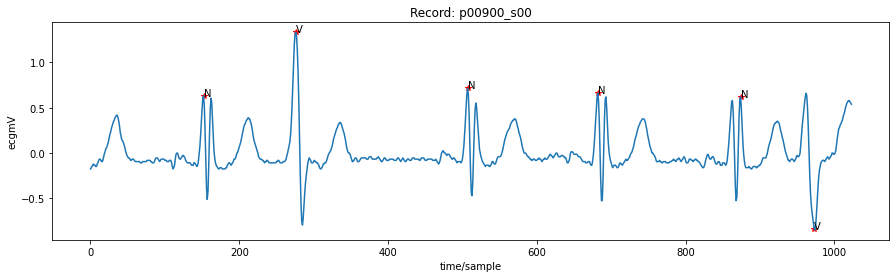

In [4]:
# Here V=ESV (PVC): Premature ventricular contraction
patient_id=900
segment_id=0
start=2000
length=1024
filename = f'{data_path}/p{patient_id:05d}/p{patient_id:05d}_s{segment_id:02d}'
rec = wfdb.rdrecord(filename, sampfrom=start, sampto=start+length)
ann = wfdb.rdann(filename, "atr", sampfrom=start, sampto=start+length, shift_samps=True)
wfdb.plot_wfdb(rec, ann, plot_sym=True, figsize=(15,4));

In [5]:
# We can load an entire segment 0 of patient 900 and count the beats
patient_id=900
segment_id=0
filename = f'{data_path}/p{patient_id:05d}/p{patient_id:05d}_s{segment_id:02d}'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")

In [6]:
print("Length of the segment: ", len(rec.p_signal))

Length of the segment:  1048577


In [7]:
# ann.symbol contains the label for each beat. The index in the record is contained in ann.sample
pd.Series(ann.symbol).value_counts()

N    5480
V     258
Q     171
+      38
S       5
dtype: int64

In [8]:
# Rhythm is encoded in aux_note. (N starts a normal rhythm and ) ends it.
pd.Series(ann.aux_note).value_counts()

None    5914
(N        19
)         19
dtype: int64

In [9]:
# Patient 1100 has a AFIB (Atrial fibrillation) regions labelled
patient_id=1100
segment_id=0
filename = f'{data_path}/p{patient_id:05d}/p{patient_id:05d}_s{segment_id:02d}'
rec = wfdb.rdrecord(filename)
ann = wfdb.rdann(filename, "atr")


In [10]:
pd.Series(ann.symbol).value_counts()

N    5178
Q    3151
+     220
V       1
dtype: int64

In [11]:
pd.Series(ann.aux_note).value_counts()

None     8330
(AFIB     110
)         110
dtype: int64